# Water Quality Prediction

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Loading the Data Set

In [3]:
df = pd.read_csv("water_potability.csv")

In [4]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<AxesSubplot:>

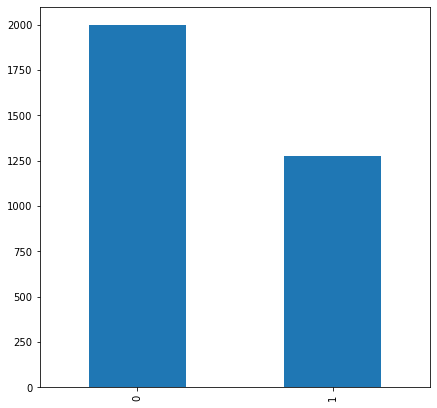

In [8]:
plt.figure(figsize=(7,7))

df["Potability"].value_counts().plot(kind="bar")

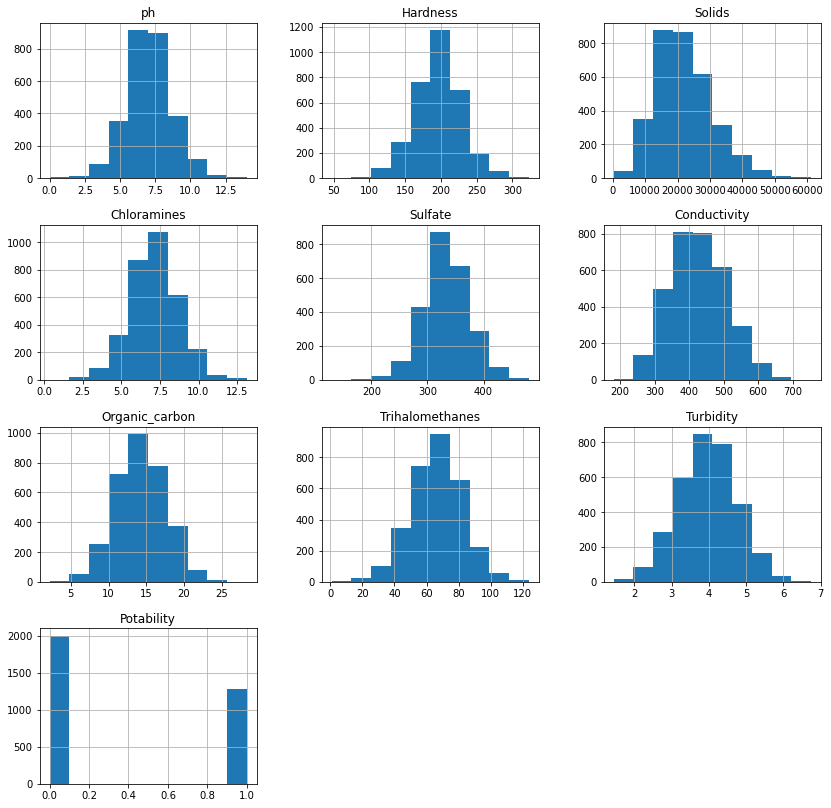

In [9]:
df.hist(figsize=(14,14))
plt.show()

# Filling up the null values

In [10]:
from sklearn.impute import KNNImputer

In [11]:
impute = KNNImputer()

In [12]:
df1 = impute.fit_transform(df)

In [13]:
df1

array([[7.15685690e+00, 2.04890455e+02, 2.07913190e+04, ...,
        8.69909705e+01, 2.96313538e+00, 0.00000000e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        5.63290763e+01, 4.50065627e+00, 0.00000000e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        6.64200925e+01, 3.05593375e+00, 0.00000000e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        6.98454003e+01, 3.29887550e+00, 1.00000000e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        7.74882131e+01, 4.70865847e+00, 1.00000000e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        7.86984463e+01, 2.30914906e+00, 1.00000000e+00]])

In [14]:
df = pd.DataFrame(df1, columns=df.columns)

In [15]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.156857,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,364.091541,392.449580,19.903225,64.327280,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,327.357588,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,325.952434,402.883113,11.168946,77.488213,4.708658,1.0


In [16]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [17]:
x = df.drop('Potability',axis=1)
y = df['Potability']

# OverSampling the Data

In [18]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [19]:
over_sampler = RandomOverSampler()

In [20]:
x_oversampled,y_oversampled = over_sampler.fit_resample(x,y)

In [21]:
counter = 0
o_df = pd.DataFrame()
for i in list(df.columns)[0:9]:
    o_df[i]=x_oversampled[i]
    counter += 1
    
o_df["Potability"] = y_oversampled
df = o_df.copy()
Counter(y_oversampled)


Counter({0.0: 1998, 1.0: 1998})

In [22]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.156857,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3991,7.580049,225.088555,31749.924396,5.884795,298.243872,503.908733,18.502406,78.354341,3.959637,1.0
3992,10.761898,81.710895,25999.953669,8.477394,318.427241,392.704082,12.716350,52.246972,4.661799,1.0
3993,7.368769,213.197019,18452.022995,8.292445,294.344858,496.270851,10.545092,94.837743,3.813881,1.0
3994,7.366672,234.200641,15547.186626,7.851400,364.105692,393.253915,15.161577,64.732311,3.394450,1.0


In [23]:
df["Potability"].value_counts()

0.0    1998
1.0    1998
Name: Potability, dtype: int64

In [24]:
X = df.drop('Potability',axis=1)
Y = df['Potability']


## Logistic regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 40)

In [27]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred_train = classifier.predict(x_train)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(f'Training-set accuracy score: {round(accuracy_score(y_train, y_pred_train),3)}')

Training-set accuracy score: 0.512


In [30]:
y_pred_test = classifier.predict(x_test)

In [31]:
print(f'Testing-set accuracy score: {round(accuracy_score(y_test, y_pred_test),3)}')

print(classification_report(y_test,y_pred_test))

Testing-set accuracy score: 0.512
              precision    recall  f1-score   support

         0.0       0.50      0.67      0.57       580
         1.0       0.54      0.37      0.44       619

    accuracy                           0.51      1199
   macro avg       0.52      0.52      0.50      1199
weighted avg       0.52      0.51      0.50      1199



## Decision Tree

In [32]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import classification_report

In [33]:
model = DecisionTreeClassifier(criterion = 'gini')
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
y_train.value_counts()

0.0    1418
1.0    1379
Name: Potability, dtype: int64

In [35]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts() 

1.0    679
0.0    520
dtype: int64

In [36]:
model.score(x_test,y_test)

0.6947456213511259

In [37]:
model.score(x_train,y_train)

1.0

In [38]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.71      0.63      0.67       580
         1.0       0.69      0.75      0.72       619

    accuracy                           0.69      1199
   macro avg       0.70      0.69      0.69      1199
weighted avg       0.70      0.69      0.69      1199



## Random forest

In [39]:
# Random Forest Classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
train = model.fit(x_train,y_train)

In [40]:
preds = model.predict(x_test)

In [45]:
print(model.score(x_train,y_train))

1.0


In [46]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.74      0.75      0.75       580
         1.0       0.76      0.75      0.76       619

    accuracy                           0.75      1199
   macro avg       0.75      0.75      0.75      1199
weighted avg       0.75      0.75      0.75      1199



In [47]:
print(accuracy_score(y_test,preds))

0.7514595496246872


## AdaBoost classifier

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
train = model.fit(x_train,y_train)

In [43]:
preds = model.predict(x_test)

In [44]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.55      0.64      0.59       580
         1.0       0.60      0.50      0.54       619

    accuracy                           0.57      1199
   macro avg       0.57      0.57      0.57      1199
weighted avg       0.57      0.57      0.57      1199



In [45]:
print(accuracy_score(y_test,preds))

0.5679733110925771


## XGB Classifier

In [46]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [47]:
model = XGBClassifier()
model.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [48]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]


In [49]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.39%


In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68       580
         1.0       0.70      0.71      0.71       619

    accuracy                           0.69      1199
   macro avg       0.69      0.69      0.69      1199
weighted avg       0.69      0.69      0.69      1199



## SVM Classifier

In [51]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [52]:
clf= SVC()
param_grid = [
              {'kernel':['rbf'],
               'gamma':[0.5,0.1,0.01],
               'C':[10,0.1,0.001,0.0001] 
              }
             ]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.01], 'kernel': ['rbf']}])

In [53]:
gsv.best_params_ , gsv.best_score_ 

({'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7261290322580646)

In [54]:
clf = SVC(C= 10, gamma = 0.5)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

Accuracy = 74.47873227689742
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79       580
         1.0       1.00      0.51      0.67       619

    accuracy                           0.74      1199
   macro avg       0.83      0.75      0.73      1199
weighted avg       0.83      0.74      0.73      1199



## LGBM Classifier

In [55]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

In [56]:
params = {}

In [57]:

clf = lgb.train(params, d_train, 100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2797, number of used features: 9
[LightGBM] [Info] Start training from score 0.493028


In [58]:
#Prediction
y_pred=clf.predict(x_test)

In [59]:
predictions = [round(value) for value in y_pred]

In [60]:
accuracy = accuracy_score(y_test, predictions)


In [61]:
accuracy

0.7089241034195163

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71       580
         1.0       0.73      0.68      0.71       619

    accuracy                           0.71      1199
   macro avg       0.71      0.71      0.71      1199
weighted avg       0.71      0.71      0.71      1199



# Feature Engineering

In [63]:
# Feature Extraction with RFE(Recursive Feature Elimination)
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [69]:
# feature extraction
model = LogisticRegression()
rfe = RFE(model, step=7)
fit = rfe.fit(X,Y)


In [70]:
#Num Features: 
fit.n_features_

4

In [71]:
#Selected Features:
fit.support_

array([False,  True, False, False,  True,  True, False,  True, False])

In [72]:
# Feature Importance with Extra Trees Classifier
# feature extraction
model = DecisionTreeClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.15216704 0.11260487 0.12195162 0.13639676 0.12767722 0.10261926
 0.08714161 0.07941021 0.08003139]


In [74]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
# feature extraction
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)


[6.047e-04 4.915e+00 4.123e+03 2.501e+00 3.600e+00 1.040e+01 3.847e+00
 6.083e-02 6.464e-03]


# Selecting best featuers 

In [75]:
X_1=df.loc[:,["ph","Hardness","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon"]]
Y_1=df["Potability"]

In [76]:
X_1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon
0,7.156857,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783
1,3.716080,129.422921,18630.057858,6.635246,336.094350,592.885359,15.180013
2,8.099124,224.236259,19909.541732,9.275884,330.449166,418.606213,16.868637
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279
...,...,...,...,...,...,...,...
3991,7.968526,156.451149,27008.011874,4.716577,320.204270,455.840428,8.360283
3992,6.908853,184.944232,16965.314109,6.404354,351.345326,434.350219,11.812942
3993,7.623500,170.427572,36267.266658,6.040735,301.219091,404.501369,12.495658
3994,8.733525,203.396130,24578.421221,6.594145,288.678463,336.824656,16.701920


In [77]:
Y_1

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3991    1.0
3992    1.0
3993    1.0
3994    1.0
3995    1.0
Name: Potability, Length: 3996, dtype: float64

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X_1,Y_1, test_size = 0.3, random_state = 40)

In [79]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [80]:
y_pred_train = classifier.predict(x_train)

In [81]:
print(f'Training-set accuracy score: {round(accuracy_score(y_train, y_pred_train),3)}')

Training-set accuracy score: 0.518


In [82]:
y_pred_test = classifier.predict(x_test)

In [83]:
print(f'Testing-set accuracy score: {round(accuracy_score(y_test, y_pred_test),3)}')

print(classification_report(y_test,y_pred_test))

Testing-set accuracy score: 0.507
              precision    recall  f1-score   support

         0.0       0.49      0.76      0.60       580
         1.0       0.55      0.27      0.36       619

    accuracy                           0.51      1199
   macro avg       0.52      0.52      0.48      1199
weighted avg       0.52      0.51      0.48      1199



In [84]:
# Random Forest Classification
model = RandomForestClassifier()
train = model.fit(x_train,y_train)


In [85]:
preds = model.predict(x_test)

In [86]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74       580
         1.0       0.76      0.73      0.74       619

    accuracy                           0.74      1199
   macro avg       0.74      0.74      0.74      1199
weighted avg       0.74      0.74      0.74      1199



In [87]:
print(accuracy_score(y_test,preds))

0.7406171809841534


In [88]:
clf= SVC()
param_grid = [
              {'kernel':['rbf'],
               'gamma':[0.5,0.1,0.01],
               'C':[10,0.1,0.001,0.0001] 
              }
             ]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.01], 'kernel': ['rbf']}])

In [89]:
gsv.best_params_ , gsv.best_score_ 

({'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7261290322580646)

In [90]:
clf = SVC(C= 10, gamma = 0.5)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

Accuracy = 74.47873227689742
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79       580
         1.0       1.00      0.51      0.67       619

    accuracy                           0.74      1199
   macro avg       0.83      0.75      0.73      1199
weighted avg       0.83      0.74      0.73      1199

